In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape ,y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [5]:
X_train[70]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 113, 120,
        107,  98, 105, 115, 147, 187, 166,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  39, 146, 243, 236, 247,
        255, 254, 255, 248, 255, 214, 238, 255, 182,  70,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 114, 224, 236, 236, 214, 204,
        230, 206, 232, 227, 199, 236, 217, 225, 232, 235,  92,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   0,   0, 220, 224, 214, 206, 254, 239,
        197, 251, 159, 225, 224, 219, 227, 233, 211, 229, 254,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   8,   0, 106, 222, 205, 207, 253, 203,  83,
        197, 203,  51, 255, 117, 126, 231, 210, 219, 217, 221,  46,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 186, 236, 221, 225, 207, 198, 130,
        213, 176,  68, 229, 172,  73, 221, 231, 214, 222, 230, 138,   0,
          0,   0],
       [  0,   0,   0,   3,   0,   0,  92, 208, 241, 217, 231, 234,  69,
        161, 142, 150, 174, 119, 211, 238, 220, 219, 239, 211, 168,   0,
          0,   0],
       [  0,   0,   0,   2,   2,   0,   0,   0,  98, 230, 220, 222, 197,
        209, 255, 228, 228, 235, 204, 212, 219, 250, 179,  41,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0,  11, 255, 222, 211,
        251, 192, 218, 230, 201, 224, 223, 247,  34,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   0,   0, 247, 218, 224,
        190, 241, 205, 220, 220, 220, 211, 253,   0,   0,   6,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   4,   0,   0, 248, 229, 209,
        234, 218, 238, 207, 222, 201, 227, 238,   0,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   3,   0,   0, 218, 218, 223,
        222, 228, 237, 223, 217, 224, 213, 241,  44,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   4,   0,  35, 241, 211, 230,
        200, 223, 224, 217, 212, 211, 206, 228, 127,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   0,  71, 241, 220, 221,
        233, 208, 233, 204, 224, 224, 212, 233, 158,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0, 125, 232, 208, 238,
        208, 233, 222, 227, 207, 210, 209, 223, 183,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0, 172, 238, 223, 221,
        245, 210, 236, 212, 225, 222, 215, 228, 229,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   4,   4,   3,   0,   0, 206, 221, 214, 233,
        196, 237, 200, 234, 207, 219, 206, 217, 212,   7,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 230, 219, 223,
        241, 196, 250, 203, 225, 220, 216, 216, 232,  54,   0,   3,   0,
          0,   0],
       [  0,   0,   0,   0,   6,   0,   0,   0,  21, 255, 189, 232, 230,
        188, 254, 195, 231, 219, 203, 232, 210, 232, 116,   0,   1,   0,
          0,   0],
       [  0,   0,   0, 128, 242, 227, 255, 254, 251, 237, 234, 233, 234,
        226, 196, 249, 213, 219, 235, 197, 224, 230, 193,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 169, 242, 224, 231, 231, 234, 232, 226, 233, 228,
        231, 242, 188, 239, 229, 192, 245, 197, 225, 233,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 197, 230, 225, 231, 224, 224, 228, 229, 229, 230,
        222, 194, 255, 202, 213, 252, 196, 228, 217, 223,   9,   0,   0,
          0,   0],
       [  0,   0,   0, 180, 249, 226, 231, 228, 225, 227, 227, 230, 228,
        227, 235, 201, 224, 231, 198, 225, 223, 202, 232,  36,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 206, 254, 229, 235, 237, 236, 231, 239, 248,
        229, 234, 244, 237, 222, 254, 224, 230, 246, 247, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 241, 24

In [6]:
y_train[70]

np.uint8(3)

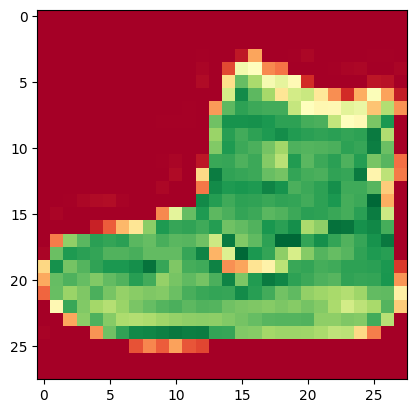

In [7]:
plt.imshow(X_train[0], cmap='RdYlGn')

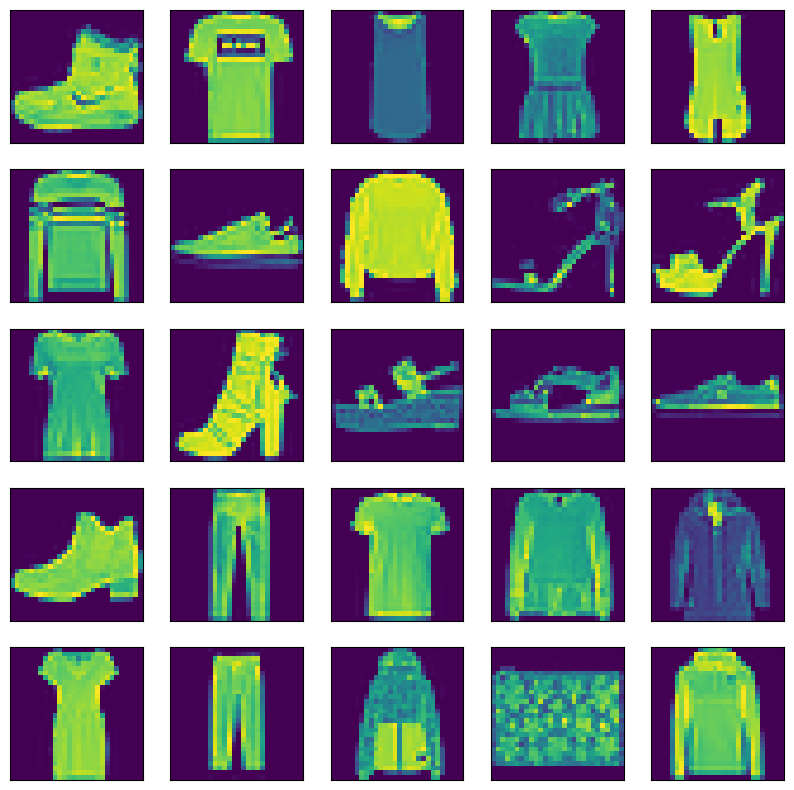

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])

# **Feature Scalling**

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# **Build Neural Network**

In [11]:
# Build the model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),      # Flatten 28x28 image to 784
    layers.Dense(128, activation='relu'),      # Hidden layer
    layers.Dense(64, activation='relu'),       # Another hidden layer
    layers.Dense(10, activation='softmax')     # Output layer: 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

validation_split

You're telling Keras:

“Use 10% of my training data to validate the model after each epoch (not for training, just for checking performance).”
🎯 Why use it?
It helps monitor how well the model generalizes to unseen data.

It gives you a sense of overfitting — if training accuracy is high but validation accuracy is low, your model is memorizing rather than learning.



In [15]:
# Train
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7747 - loss: 0.6418 - val_accuracy: 0.8593 - val_loss: 0.3860
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8648 - loss: 0.3736 - val_accuracy: 0.8583 - val_loss: 0.3958
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8734 - loss: 0.3427 - val_accuracy: 0.8720 - val_loss: 0.3547
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8850 - loss: 0.3101 - val_accuracy: 0.8708 - val_loss: 0.3672
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8923 - loss: 0.2936 - val_accuracy: 0.8773 - val_loss: 0.3335
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8957 - loss: 0.2758 - val_accuracy: 0.8792 - val_loss: 0.3459
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8997 - loss: 0.2702 - val_accuracy: 0.8857 - val_loss: 0.3225
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9056 - loss: 0.2523 - 

In [16]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8872 - loss: 0.3382


[0.33284786343574524, 0.8863000273704529]

In [17]:
# Class names for labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [19]:
predictions=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


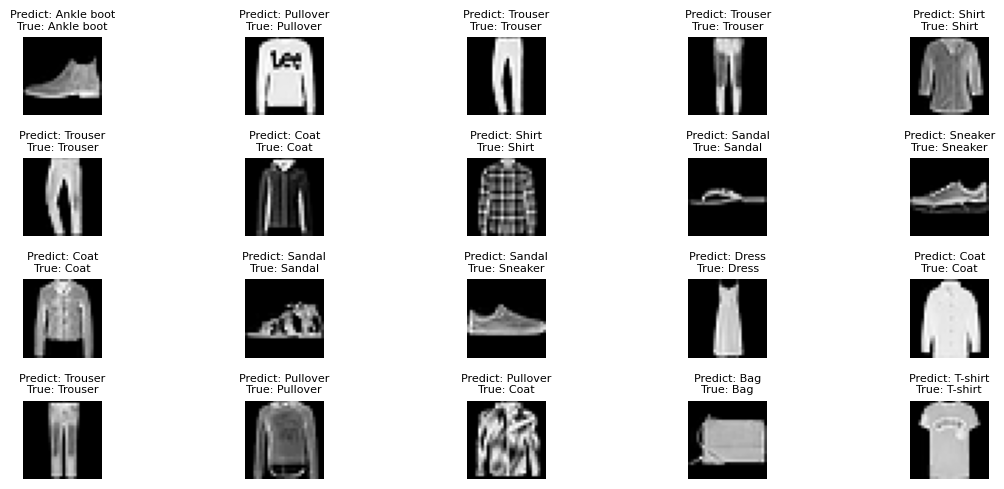

In [30]:
# How many images to show
num_images =20

# Grid size (4 rows x 5 columns)
rows, cols = 4, 5
plt.figure(figsize=(12, 5))  # Width x Height of the whole grid

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"Predict: {class_names[pred_label]}\nTrue: {class_names[true_label]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

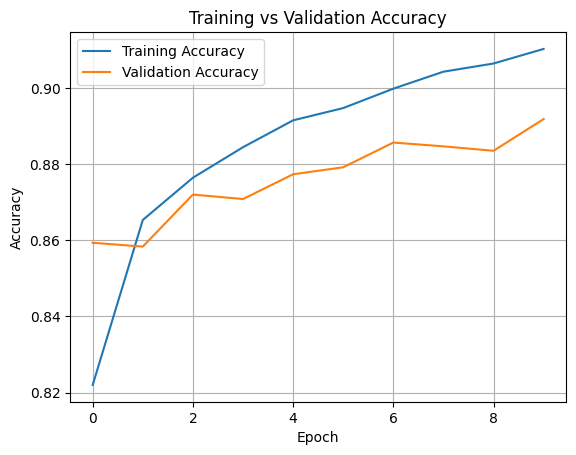

In [31]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()


In [32]:
# Predict class labels
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

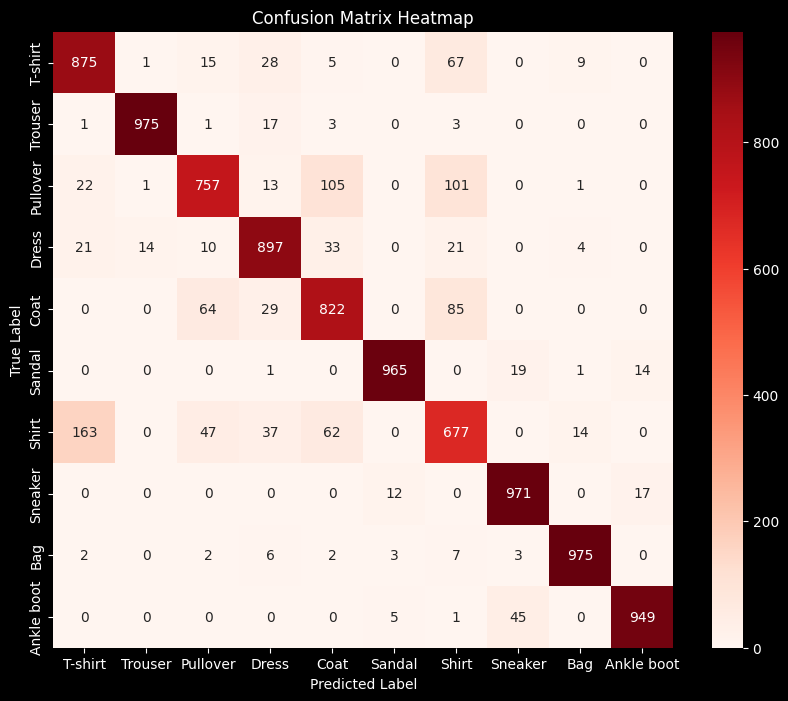

In [43]:
# Plot heatmap
import seaborn as sns
plt.style.use('dark_background')  # 🔥 dark mode

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()